# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Wadkins\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [2]:
hdf = pd.read_csv('heroes_information.csv')
pdf = pd.read_csv('super_hero_powers.csv')

In [3]:
hdf.head(30)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


In [4]:
pdf.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [5]:
hdf.drop(axis=1, columns=['Unnamed: 0'], inplace=True)
hdf.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [6]:
hdf.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [7]:
hdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        734 non-null    object 
 1   Gender      734 non-null    object 
 2   Eye color   734 non-null    object 
 3   Race        734 non-null    object 
 4   Hair color  734 non-null    object 
 5   Height      734 non-null    float64
 6   Publisher   719 non-null    object 
 7   Skin color  734 non-null    object 
 8   Alignment   734 non-null    object 
 9   Weight      732 non-null    float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


In [8]:
pdf.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Domino,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [9]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [10]:
hdf.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [11]:
pdf.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [12]:
hdf.isna().sum()
# 15 entries have no publisher. We will drop these rows from our dataset.
# 2 entries have no weight. We will investigate the Weight dataset further.

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [13]:
hdf['Publisher'].value_counts()
#what are the most common publishers in our dataset?

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
Star Trek              6
HarperCollins          6
SyFy                   5
Team Epic TV           5
ABC Studios            4
Shueisha               4
Icon Comics            4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
Microsoft              1
South Park             1
Hanna-Barbera          1
J. K. Rowling          1
Rebellion              1
J. R. R. Tolkien       1
Universal Studios      1
Titan Books            1
Name: Publisher, dtype: int64

In [14]:
hdf.loc[(hdf['Publisher'].isna())]
# what are the rows without a publisher?
# we also can see right here that Weight and Height seem to have a lot of outliers, at least in this slice.
# Another reminder to check on Weight and Height in more detail.

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [15]:
#we will drop the rows without a publisher, as most of the publishers are Marvel or DC
# we use our dropna which drops all rows with a NaN, but we tell it to only look in the publisher column.
hdf.dropna(subset=['Publisher'], inplace=True)

In [16]:
hdf.isna().sum()
#we happened to get rid of our NaN weight values when we dropped the data with no publisher.
# but, we saw that the Weight data is wonky and need to explore that further

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [17]:
hdf['Weight'].value_counts()
# there is a LOT of placeholder value in weight. Let's look at our distribution.

-99.0     225
 79.0      23
 54.0      23
 81.0      22
 90.0      19
         ... 
 132.0      1
 38.0       1
 412.0      1
 320.0      1
 855.0      1
Name: Weight, Length: 135, dtype: int64

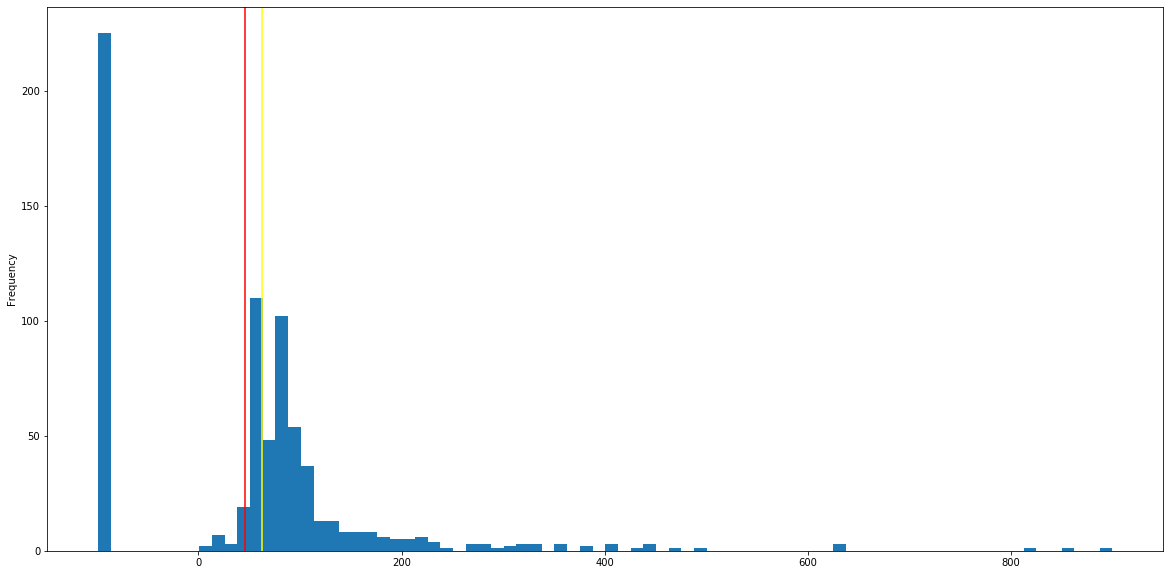

In [18]:
# check our current weight distribution
hdf['Weight'].median()
weight = hdf['Weight'].plot(kind='hist', figsize=(20,10), bins=80)
weight.plot()
plt.axvline(hdf['Weight'].mean(), color='red')
plt.axvline(hdf['Weight'].median(), color='yellow')
# our weight mean is skewed left because of the placeholders. We can change the placeholders to the Median value to improve our distribution.

In [19]:
# what's the current standard deviation?
hdf['Weight'].std()

130.67549165571694

In [20]:
hdf.loc[(hdf['Weight'] == -99)]
# Let's try dropping all of the records with no Weight entry at all
hdf.drop(hdf[hdf['Weight'] == -99].index, inplace = True)

In [ ]:
# we're assigning all of our Weight columns that previously equaled -99 to be the median
# wmedian = hdf['Weight'].median()
# hdf.loc[(hdf['Weight'] == -99), 'Weight'] = wmedian

In [21]:
hdf[(hdf['Weight'] == -99)]
# confirming that all of our placeholder Weight columns are gone

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


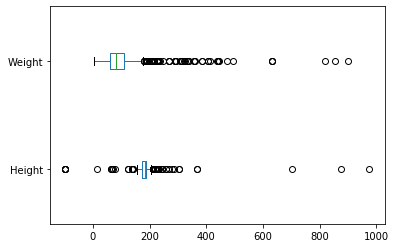

In [22]:
# Let's take a look at our outliers. We will consider removing them, but let's visualize first.

hdf.plot.box(vert=False);

In [23]:
# Then we are assigning our outliers that are outside of 1%-99% to the current median
#wmedian = hdf['Weight'].median()
#hdf.loc[((hdf['Weight'] < hdf['Weight'].quantile(.01)) | (hdf['Weight'] > hdf['Weight'].quantile(.99))), 'Weight'] = wmedian

# We are setting our outliers equal to the upper and lower 1%
hdf.loc[(hdf['Weight'] > hdf['Weight'].quantile(.99)), 'Weight'] = hdf['Weight'].quantile(.99)
hdf.loc[(hdf['Weight'] < hdf['Weight'].quantile(.01)), 'Weight'] = hdf['Weight'].quantile(.01)

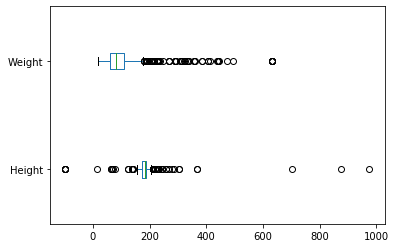

In [24]:
# What does our box plot look like now?

hdf.plot.box(vert=False);

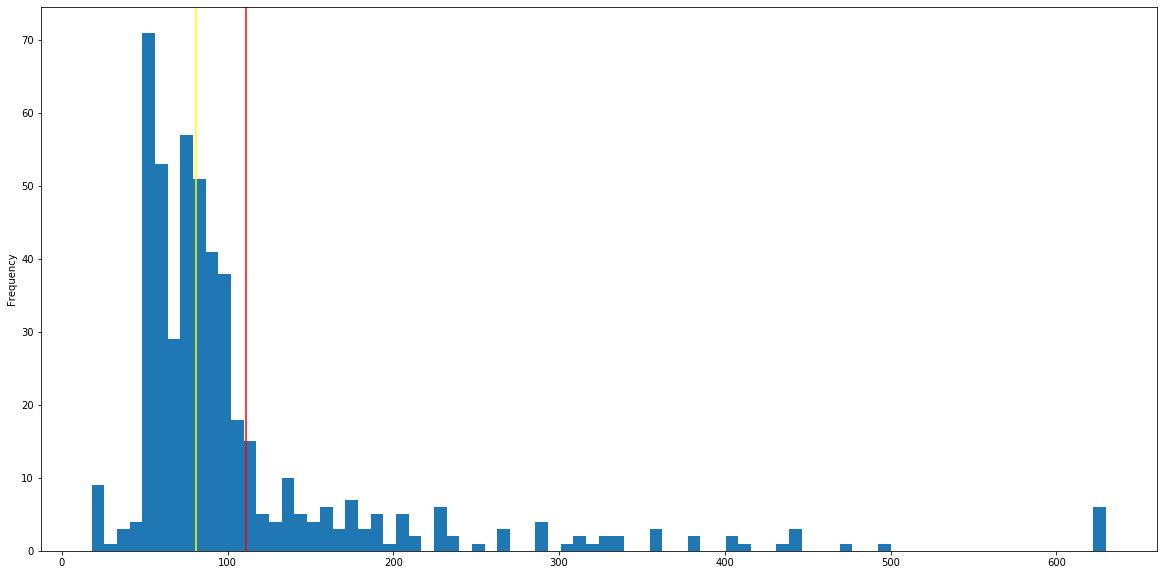

In [25]:
# plot a hist with the new weight distribution
hdf['Weight'].median()
weight = hdf['Weight'].plot(kind='hist', figsize=(20,10), bins=80)
weight.plot()
plt.axvline(hdf['Weight'].mean(), color='red')
plt.axvline(hdf['Weight'].median(), color='yellow')

In [26]:
# new standard deviation. Better? Still huge. 
hdf['Weight'].std()


95.3794398506085

In [27]:
# Time to check our Height values
hdf['Height'].value_counts()

 183.0    54
 188.0    48
 180.0    38
 178.0    36
 175.0    34
 185.0    34
 168.0    28
 165.0    26
 170.0    23
 191.0    21
 193.0    19
 198.0    18
 173.0    17
 196.0    11
 201.0    11
 163.0     8
 213.0     5
 211.0     5
-99.0      5
 157.0     5
 203.0     5
 244.0     4
 229.0     3
 155.0     3
 218.0     3
 226.0     2
 137.0     2
 305.0     2
 366.0     2
 206.0     2
 122.0     2
 160.0     1
 279.0     1
 287.0     1
 259.0     1
 267.0     1
 257.0     1
 701.0     1
 66.0      1
 15.2      1
 140.0     1
 64.0      1
 234.0     1
 71.0      1
 79.0      1
 62.5      1
 876.0     1
 142.0     1
 975.0     1
Name: Height, dtype: int64

In [28]:
hdf.head(25)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0
10,Agent Zero,Male,-,-,-,191.0,Marvel Comics,-,good,104.0
11,Air-Walker,Male,blue,-,White,188.0,Marvel Comics,-,bad,108.0


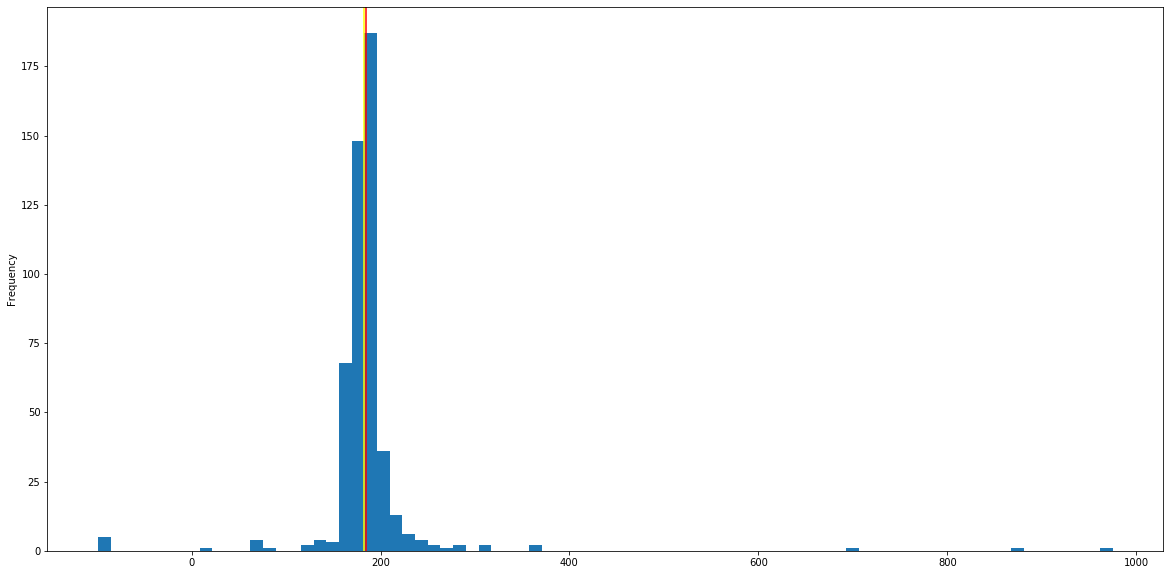

In [29]:
# now looking into our Height distribution
hdf['Height'].median()
weight = hdf['Height'].plot(kind='hist', figsize=(20,10), bins=80)
weight.plot()
plt.axvline(hdf['Height'].mean(), color='red')
plt.axvline(hdf['Height'].median(), color='yellow')

In [30]:
# what's the current standard deviation?
hdf['Height'].std()

65.37136399146071

In [31]:
# we're assigning all of our Height columns that previously equaled -99 to be the median, because there are only a few
hdf.loc[(hdf['Height'] == -99), 'Height'] = hdf['Height'].median()

# then we are assigning anything outside of the 1-99th percentile to the median, to eliminate our outliers
# hdf.loc[((hdf['Height'] < hdf['Height'].quantile(.01)) | (hdf['Height'] > hdf['Height'].quantile(.99))), 'Height'] = hmedian

# We are setting our outliers equal to the upper and lower 1%
hdf.loc[(hdf['Height'] > hdf['Height'].quantile(.99)), 'Height'] = hdf['Height'].quantile(.99)
hdf.loc[(hdf['Height'] < hdf['Height'].quantile(.01)), 'Height'] = hdf['Height'].quantile(.01)

In [32]:
# confirming that all of our placeholder Height columns are gone
hdf[(hdf['Height'] == -99)]
#hdf['Height'].value_counts()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight


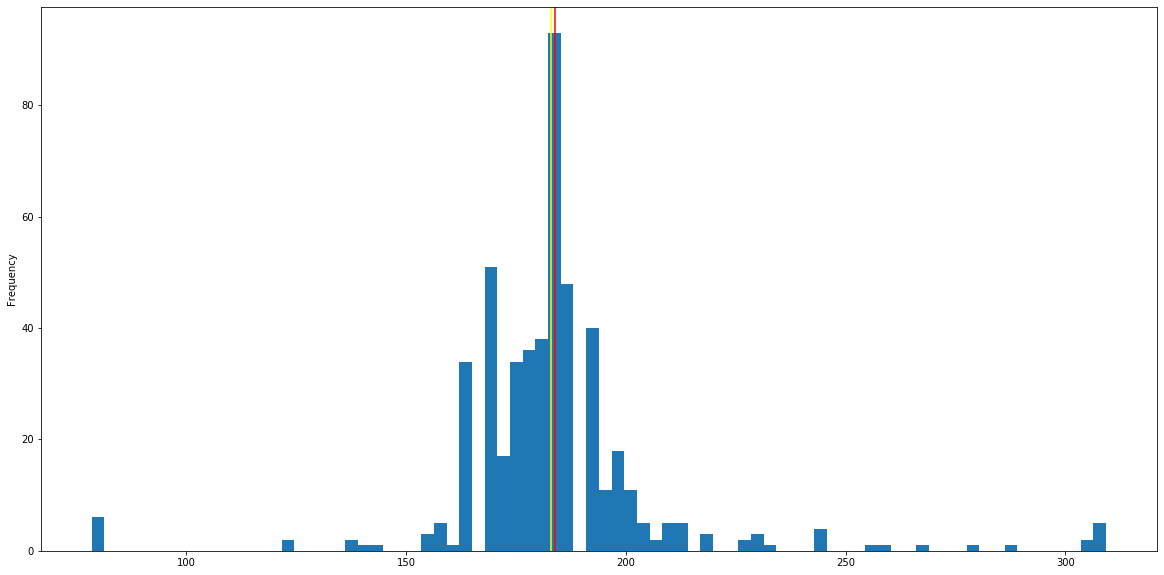

In [33]:
# plot a hist with the new Height distribution
hdf['Height'].median()
weight = hdf['Height'].plot(kind='hist', figsize=(20,10), bins=80)
weight.plot()
plt.axvline(hdf['Height'].mean(), color='red')
plt.axvline(hdf['Height'].median(), color='yellow')

In [34]:
# new standard deviation for Height
hdf['Height'].std()


25.401966466319003

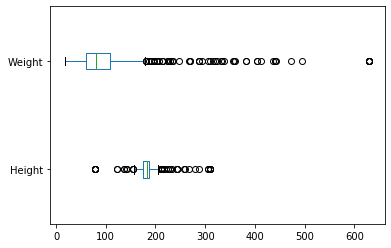

In [35]:
# What does our box plot look like now?

hdf.plot.box(vert=False);

In [36]:
# time to check out our other data, pdf

pdf.isna().sum()
#looks like these are all booleans

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

In [37]:
pdf.dtypes
# yep, all booleans

hero_names               object
Agility                    bool
Accelerated Healing        bool
Lantern Power Ring         bool
Dimensional Awareness      bool
                          ...  
Phoenix Force              bool
Molecular Dissipation      bool
Vision - Cryo              bool
Omnipresent                bool
Omniscient                 bool
Length: 168, dtype: object

In [38]:
pdf.info()
# all booleans and all with entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [39]:
pdf['hero_names'].isna().sum()
# no hero names are missing

0

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [40]:
# set the index of each of hdf and pdf to be the hero name
pdf = pdf.set_index('hero_names')
hdf = hdf.set_index('name')

In [41]:
#inner join the tables so that we have only records with both a full description and a powers list
joined_df = hdf.join(pdf, how='inner')
joined_df

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.00,Marvel Comics,-,good,441.00,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.00,Dark Horse Comics,blue,good,65.00,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.00,DC Comics,red,good,90.00,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.00,Marvel Comics,-,bad,441.00,False,...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.00,Marvel Comics,-,bad,122.00,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowjacket,Male,blue,Human,Blond,183.00,Marvel Comics,-,good,83.00,False,...,False,False,False,False,False,False,False,False,False,False
Yellowjacket II,Female,blue,Human,Strawberry Blond,165.00,Marvel Comics,-,good,52.00,False,...,False,False,False,False,False,False,False,False,False,False
Yoda,Male,brown,Yoda's species,White,78.44,George Lucas,green,good,17.93,True,...,False,False,False,False,False,False,False,False,False,False
Zatanna,Female,blue,Human,Black,170.00,DC Comics,-,good,57.00,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
joined_df.isna().sum()

Gender                   0
Eye color                0
Race                     0
Hair color               0
Height                   0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 176, dtype: int64

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [43]:
female = joined_df.loc[(joined_df['Gender'] == 'Female')]
male = joined_df.loc[(joined_df['Gender'] == 'Male')]

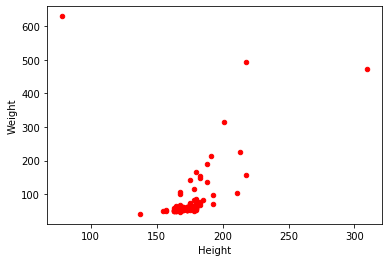

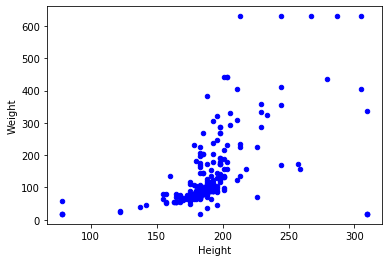

In [44]:
ax = female.plot.scatter('Height', 'Weight', 
                        c = 'red');
ax2 = male.plot.scatter('Height', 'Weight', c = 'blue')



## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [73]:
male_heroes_df = None
female_heroes_df = joined_df.groupby('Gender')

def show_distplot(dataframe, gender, column_name):
    pass


female_heroes_df.mean()

SyntaxError: keyword can't be an expression (<ipython-input-73-7dd5dc05ef4f>, line 2)

In [ ]:
# Male Height


In [ ]:
# Male Weight


In [ ]:
# Female Height


In [ ]:
# Female Weight


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [64]:
joined_df.iloc[:, 9:].value_counts()
joined_df.iloc[9].value_counts()


False            162
True               5
-                  1
Marvel Comics      1
90.0               1
brown              1
Cyborg             1
Male               1
Black              1
bad                1
193.0              1
Name: Ajax, dtype: int64

,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Gender,,,,,,,,,,,,,,,,,,,,,
-,186.375000,161.875000,0.250000,0.250000,0.000000,0.000000,0.000000,0.500000,0.125000,0.000000,...,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
Female,173.612667,79.859259,0.429630,0.229630,0.000000,0.007407,0.074074,0.385185,0.222222,0.125926,...,0.022222,0.007407,0.000000,0.000000,0.000000,0.007407,0.0,0.000000,0.0,0.0
Male,188.530370,124.643981,0.416667,0.330247,0.024691,0.037037,0.092593,0.478395,0.200617,0.108025,...,0.030864,0.012346,0.006173,0.024691,0.003086,0.000000,0.0,0.003086,0.0,0.0


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data